<h1>🌸 Klasifikasi Iris — Notebook Latihan Machine Learning</h1>

<p><strong>Kita akan membangun beberapa model klasifikasi untuk mengenali jenis bunga <em>Iris</em> berdasarkan ukuran kelopak bunga (petal).</strong></p>

<h2>Alur Latihan:</h2>
<ol>
  <li>Persiapan environment & impor pustaka</li>
  <li>Memuat dataset Iris dari <code>sklearn.datasets</code></li>
  <li>Pembagian data latih/uji</li>
  <li>Standarisasi fitur (scaling)</li>
  <li>Model 1: <strong>Perceptron</strong></li>
  <li>Model 2: <strong>Logistic Regression</strong></li>
  <li>Model 3: <strong>SVM (Support Vector Machine)</strong></li>
  <li>Model 4: <strong>Random Forest</strong></li>
  <li>Model 5: <strong>K-Nearest Neighbors (KNN)</strong></li>
</ol>

<p><strong>Catatan:</strong> Dataset <em>Iris</em> sudah tersedia di pustaka <code>sklearn</code>, jadi kita tidak perlu mengunggah file CSV.</p>


## 1) Persiapan environment & impor pustaka

In [1]:
import pandas as pd
from sklearn import datasets
import numpy as np # Silakan diisi bagian ini dengan kode yang tepat (5)

## 2) Memuat dataset Iris dari <code>sklearn.datasets

<p>Memuat dataset Iris dari scikit-learn. Di sini, kolom ketiga merepresentasikan panjang petal, dan kolom keempat merepresentasikan lebar petal dari contoh bunga. Kelas sudah dikonversi ke label integer dengan keterangan: 0 = Iris-Setosa, 1 = Iris-Versicolor, 2 = Iris-Virginica. </p>

In [3]:
# Muat dataset Iris
iris = datasets.load_iris() # Silakan diisi bagian ini dengan kode yang tepat (5)

# Ubah jadi DataFrame (ambil 2 fitur: petal length & petal width)
df_iris = pd.DataFrame(
    data=iris.data[:, [2, 3]],          
    columns=['petal length (cm)', 'petal width (cm)']
)

# Tambahkan kolom target (0=setosa, 1=versicolor, 2=virginica)
df_iris['target'] = iris.target

# Pisahkan fitur (X) dan label (y)
X = df_iris[['petal length (cm)', 'petal width (cm)']]
y = df_iris['target']

# Tampilkan kelas unik (0,1,2)
print("Class labels:", np.unique(y))

# Lihat 5 baris pertama data
df_iris.head()


Class labels: [0 1 2]


,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


##  Eksplorasi Data Awal

<p> Pada tahap ini dilakukan pemeriksaan cepat dataset Iris untuk melihat ukuran data, tipe tiap kolom, dan nilai kosong. Hasilnya, semua fitur bertipe numerik dan tidak ada missing values, sehingga data siap diproses lebih lanjut. </p>

In [4]:
# Info cepat tentang kolom & tipe datanya
print("Jumlah baris, kolom:", df_iris.shape)
print("\nTipe data:")
print(df_iris.dtypes)

Jumlah baris, kolom: (150, 3)

Tipe data:
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object


In [9]:
# Cek jumlah nilai kosong per kolom
print("Jumlah nilai kosong per kolom:\n", df_iris.isnull().sum()) # Silakan diisi bagian ini dengan kode yang tepat (5)

Jumlah nilai kosong per kolom:
 petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


## 3) Pembagian data latih/uji
Dataset dibagi menjadi 70% data latih dan 30% data uji menggunakan train_test_split. Parameter stratify=y menjaga distribusi kelas tetap seimbang, sedangkan random_state=1 memastikan hasil pembagian konsisten setiap kali dijalankan.

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

# 1) Pisahkan fitur (X) dan label (y) dari data yang sudah dibersihkan
X = df_iris[['petal length (cm)', 'petal width (cm)']]
y = df_iris['target']

# 2) Train-test split
# test_size=0.3 -> 30% data untuk uji, 70% untuk latih
# random_state=1 -> agar hasil konsisten
# stratify=y -> supaya distribusi kelas seimbang

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
) # Silakan diisi bagian ini dengan kode yang tepat (10)

print("Ukuran X_train, X_test:", X_train.shape, X_test.shape)

# 3) Cek distribusi kelas
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))


Ukuran X_train, X_test: (105, 2) (45, 2)
Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


## 4) Standarisasi fitur (scaling)

<p>Standarisasi dilakukan dengan StandardScaler, yaitu mengubah fitur agar memiliki mean = 0 dan standar deviasi = 1. Proses fit hanya dilakukan pada data latih untuk mencegah kebocoran informasi, lalu hasilnya dipakai untuk mentransformasi baik data latih maupun data uji.</p>


In [11]:
from sklearn.preprocessing import StandardScaler

# Buat objek StandardScaler untuk standarisasi data
sc = StandardScaler()

# Hitung mean dan std dari data latih (X_train) 
# -> hanya fit di data latih, agar data uji tidak "bocor"
sc.fit(X_train)

# Transformasi data latih sesuai mean & std tadi
X_train_std = sc.transform(X_train)

# Transformasi data uji dengan parameter dari data latih
X_test_std = sc.transform(X_test)


## 5) Model 1: Perceptron 

In [12]:
from sklearn.linear_model import Perceptron

# Buat objek model Perceptron
# - eta0=0.1 -> learning rate (kecepatan update bobot)
# - random_state=1 -> supaya hasil konsisten/reproducible
ppn = Perceptron(eta0=0.1, random_state=1) # Silakan diisi bagian ini dengan kode yang tepat (5)

# Latih model menggunakan data latih yang sudah distandardisasi
ppn.fit(X_train_std, y_train)


Perceptron(eta0=0.1, random_state=1)

In [13]:
# Prediksi label data uji dengan model Perceptron
y_pred = ppn.predict(X_test_std)

# Hitung jumlah data uji yang salah klasifikasi
# (bandingkan label asli vs hasil prediksi, lalu hitung selisihnya)
print('Jumlah contoh yang salah klasifikasi:', (y_test != y_pred).sum())


Jumlah contoh yang salah klasifikasi: 1


In [14]:
from sklearn.metrics import accuracy_score

# Hitung akurasi dengan accuracy_score (bandingkan y_test vs y_pred secara eksplisit)
print('Akurasi (pakai accuracy_score): %.3f' % accuracy_score(y_test, y_pred))

# Hitung akurasi dengan .score() bawaan model Perceptron
# (otomatis memanggil .predict() lalu bandingkan hasil dengan y_test)
print('Akurasi (pakai ppn.score): %.3f' % ppn.score(X_test_std, y_test))


Akurasi (pakai accuracy_score): 0.978
Akurasi (pakai ppn.score): 0.978


### Pembuatan Fungsi untuk Visualisasi Area Keputusan
Fungsi `plot_decision_regions` digunakan untuk memvisualisasikan **batas keputusan (decision boundary)** dari sebuah model klasifikasi pada data berdimensi dua. Pertama, fungsi ini menyiapkan **marker** dan **colormap** untuk membedakan kelas dengan warna serta bentuk simbol yang berbeda. Selanjutnya, ditentukan rentang nilai dari dua fitur (sumbu X dan Y), kemudian dibuat grid dengan resolusi tertentu (`resolution=0.02`). Setiap titik dalam grid tersebut diprediksi kelasnya menggunakan classifier yang diberikan, lalu hasil prediksi digambarkan dalam bentuk **kontur berwarna** sehingga terlihat area keputusan masing-masing kelas. Setelah itu, data asli ditampilkan dalam bentuk scatter plot dengan marker dan warna yang sesuai dengan kelasnya, sehingga kita dapat membandingkan distribusi data dengan batas keputusan model. Jika indeks data uji (`test_idx`) disediakan, maka data uji akan diberi tanda khusus berupa lingkaran besar tanpa isi (hanya outline hitam) untuk menekankan perbedaan antara data latih dan data uji. Dengan cara ini, fungsi ini sangat berguna untuk memahami bagaimana sebuah classifier membagi ruang fitur serta mengevaluasi performa pemisahan antar kelas secara visual.


In [15]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Untuk mengecek kompatibilitas versi matplotlib
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    """
    Fungsi untuk mem-plot batas keputusan (decision boundary)
    dari sebuah classifier pada dataset 2D.
    """

    # setup marker generator dan colormap
    markers = ('o', 's', '^', 'v', '<')              # bentuk marker
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')  # warna untuk tiap kelas
    cmap = ListedColormap(colors[:len(np.unique(y))])       # pilih warna sesuai jumlah kelas

    # plot permukaan batas keputusan
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1   # range fitur ke-1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1   # range fitur ke-2
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # prediksi kelas untuk tiap titik di grid
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    # plot kontur (area warna sesuai kelas)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot data training per kelas
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight (tandai) data uji
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')


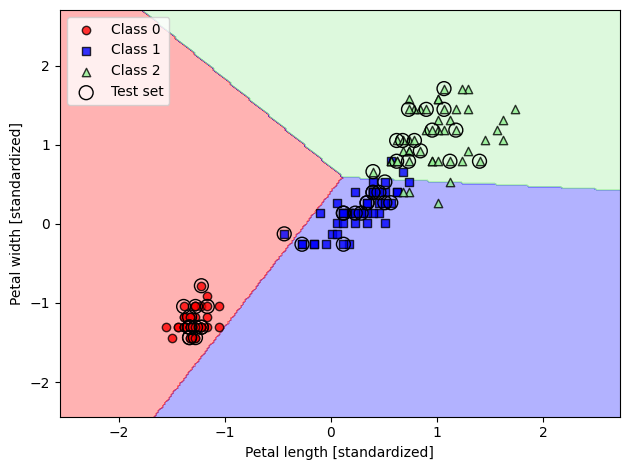

In [16]:
# Gabungkan kembali data latih dan data uji (fitur)
X_combined_std = np.vstack((X_train_std, X_test_std))  # vstack = sambung secara vertikal

# Gabungkan kembali label latih dan label uji
y_combined = np.hstack((y_train, y_test))  # hstack = sambung secara horizontal

# Panggil fungsi plot_decision_regions untuk menampilkan boundary
# test_idx=range(105,150) -> menandai indeks data uji (karena total data latih 105, sisanya 45 data uji)
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))

# Label sumbu X dan Y
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

# Tambahkan legenda
plt.legend(loc='upper left')

plt.tight_layout()

# Tampilkan plot
plt.show() # Silakan diisi bagian ini dengan kode yang tepat (5)


# 6) Model 2: Logistic Regression

<ul><strong>
  <li>Logistic Regression adalah model klasifikasi yang memprediksi probabilitas suatu kelas menggunakan fungsi logistik (sigmoid).</li>
  <li>Cocok digunakan untuk masalah biner maupun multikelas.</li>
  <li>Parameter penting:</li>
  <ul>
    <li><b>C</b> → Mengatur kekuatan regulasi (semakin besar C, regulasi makin lemah).</li>
    <li><b>solver</b> → Metode optimasi, misalnya 'lbfgs', 'saga', atau 'liblinear'.</li>
    <li><b>multi_class</b> → Strategi multiclass, seperti 'ovr' (one-vs-rest) atau 'multinomial'.</li>
  </ul>
<strong></ul>


/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


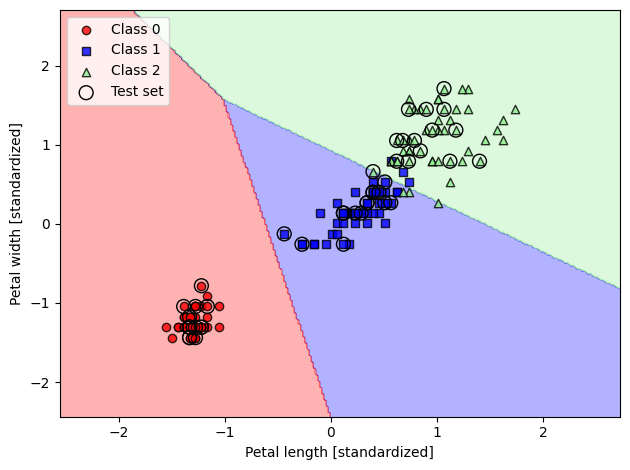

In [ ]:
from sklearn.linear_model import LogisticRegression # Silakan diisi bagian ini dengan kode yang tepat (5)

lr = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr') # Silakan diisi bagian ini dengan kode yang tepat (10)

# Latih model pada data training yang sudah distandardisasi
lr.fit(X_train_std, y_train)

# Visualisasi decision boundary menggunakan fungsi plot_decision_regions
# - X_combined_std = gabungan data train dan test
# - y_combined = gabungan label train dan test
# - classifier=lr : gunakan model logistic regression yang sudah dilatih
# - test_idx=range(105,150) : menandai indeks data test agar terlihat berbeda di plot
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))

# Label sumbu
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

# Tampilkan legenda untuk membedakan kelas dan data test
plt.legend(loc='upper left')

plt.tight_layout()

# Tampilkan plot
plt.show()


In [64]:
# Probabilitas prediksi 3 sampel pertama
print("Probabilitas:\n", lr.predict_proba(X_test_std[:3, :]))

# Jumlah probabilitas per sampel (selalu = 1)
print("Jumlah probabilitas:", lr.predict_proba(X_test_std[:3, :]).sum(axis=1))

# Argmax dari probabilitas (kelas dengan nilai tertinggi)
print("Kelas argmax:", lr.predict_proba(X_test_std[:3, :]).argmax(axis=1))

# Prediksi langsung (sama dengan argmax)
print("Prediksi (3 sampel):", lr.predict(X_test_std[:3, :]))

# Prediksi satu sampel saja
print("Prediksi sampel pertama:", lr.predict(X_test_std[0, :].reshape(1, -1)))


Probabilitas:
 [[8.61106228e-07 1.55587828e-01 8.44411311e-01]
 [8.29321034e-01 1.70678961e-01 4.98663443e-09]
 [8.44987973e-01 1.55012026e-01 9.48341079e-10]]
Jumlah probabilitas: [1. 1. 1.]
Kelas argmax: [2 0 0]
Prediksi (3 sampel): [2 0 0]
Prediksi sampel pertama: [2]


### Mengatasi Overfitting dengan Regularisasi

/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic

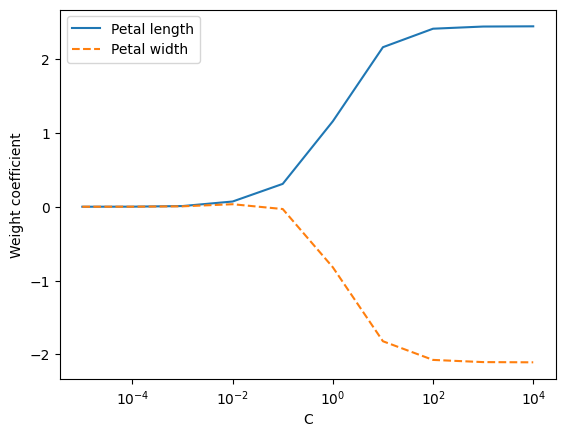

In [66]:
weights, params = [], []

# Uji Logistic Regression dengan berbagai nilai C (kebalikan dari kekuatan regulasi)
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c,   # skala log: dari 1e-5 sampai 1e+4
                            multi_class='ovr')
    lr.fit(X_train_std, y_train)
    # Simpan bobot (koefisien) untuk kelas ke-1
    weights.append(lr.coef_[1])
    params.append(10.**c)

# Konversi ke numpy array agar mudah diolah
weights = np.array(weights)

# Plot perubahan koefisien bobot terhadap nilai C
plt.plot(params, weights[:, 0], label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')

plt.ylabel('Weight coefficient')

plt.xlabel("C")  # Silakan diisi bagian ini dengan kode yang tepat (5)

plt.legend(loc='upper left')

# Sumbu x log-scale (karena C bervariasi dalam orde besar)
plt.xscale('log')

# plt.savefig('figures/03_08.png', dpi=300)  # opsional simpan gambar
plt.show()

<br>
<br>

# 7) Model 3: Support Vector Machine (SVM) — implementasi via scikit-learn `SVC`

<ul><strong>
  <li><b>Support Vector Machine (SVM)</b> adalah model klasifikasi yang mencari <i>garis batas (hyperplane)</i> terbaik untuk memisahkan kelas data.</li>
  <li>Dapat menggunakan berbagai jenis <b>kernel</b> untuk menangani data linear maupun non-linear.</li>
  <li>Parameter penting:</li>
  <ul>
    <li><b>kernel</b> → Jenis fungsi kernel yang digunakan:
      <ul>
        <li><code>'linear'</code> → memisahkan kelas dengan garis lurus (<i>hyperplane linear</i>).</li>
        <li><code>'rbf'</code>, <code>'poly'</code>, dll. → untuk data non-linear.</li>
      </ul>
    </li>
    <li><b>C</b> → Parameter regularisasi:
      <ul>
        <li>Nilai <b>besar C</b> → margin sempit, model fokus pada klasifikasi benar (risiko overfitting).</li>
        <li>Nilai <b>kecil C</b> → margin lebar, model lebih toleran terhadap kesalahan.</li>
      </ul>
    </li>
    <li><b>random_state</b> → Menjamin hasil yang konsisten di setiap eksekusi.</li>
  </ul>
<strong></ul>


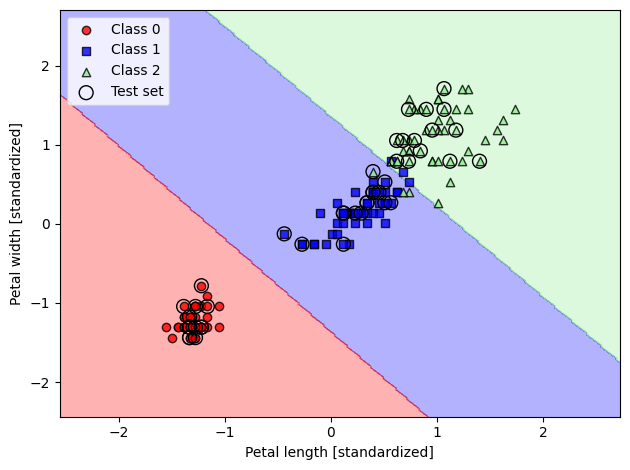

In [68]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1) # Silakan diisi bagian ini dengan kode yang tepat (10)

# Latih model SVM dengan data training yang sudah distandardisasi
svm.fit(X_train_std, y_train)

# Visualisasikan decision boundary SVM
# - X_combined_std, y_combined → gabungan data train & test
# - classifier=svm → gunakan model SVM yang sudah dilatih
# - test_idx=range(105, 150) → tandai data uji (45 sampel terakhir) dengan lingkaran
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))

# Label sumbu
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]') # Silakan diisi bagian ini dengan kode yang tepat (5)

# Tambahkan legenda (keterangan kelas + test set)
plt.legend(loc='upper left')

plt.tight_layout()

# Tampilkan plot
plt.show()


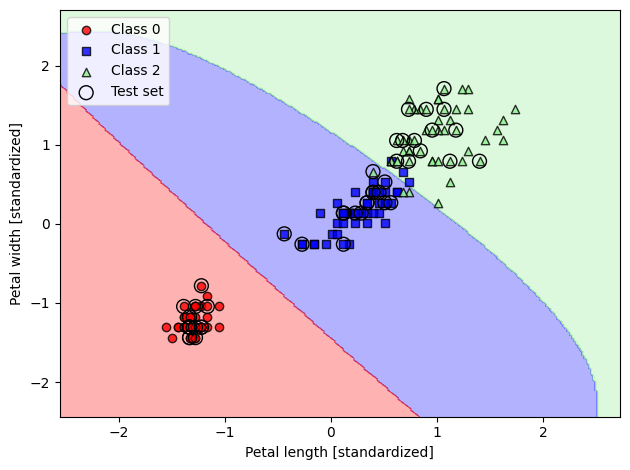

In [69]:
from sklearn.svm import SVC

# Buat model Support Vector Machine (SVM) dengan kernel RBF
# - kernel='rbf' → gunakan fungsi basis radial (non-linear)
# - gamma=0.2 → mengontrol "jangkauan" pengaruh tiap titik data 
#               (gamma kecil → boundary halus, gamma besar → boundary kompleks)
# - C=1.0 → parameter regularisasi (keseimbangan antara margin lebar & error training)
# - random_state=1 → agar hasil konsisten
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)

# Latih model dengan data training yang sudah distandardisasi
svm.fit(X_train_std, y_train)

# Visualisasikan decision boundary
# - X_combined_std & y_combined → gabungan data train + test
# - classifier=svm → gunakan model SVM yang sudah dilatih
# - test_idx=range(105, 150) → tandai data test (45 sampel terakhir)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))

# Label sumbu
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

# Tampilkan legenda (keterangan kelas & test set)
plt.legend(loc='upper left')

# Rapikan layout
plt.tight_layout()

# Tampilkan plot
plt.show()


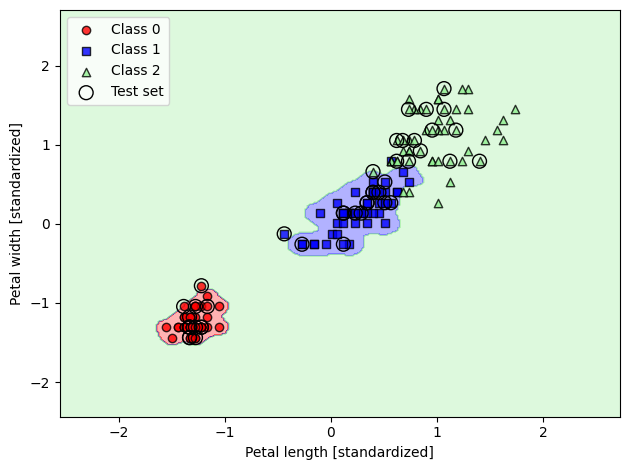

In [70]:
# Buat model SVM dengan kernel RBF (non-linear)
# - kernel='rbf' → gunakan fungsi basis radial
# - gamma=100.0 → sangat besar, boundary jadi sangat kompleks 
#                 (model cenderung mengikuti data training → overfitting)
# - C=1.0 → parameter regularisasi
# - random_state=1 → agar hasil konsisten
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)

# Latih model dengan data training
svm.fit(X_train_std, y_train)

# Visualisasikan decision boundary SVM
# - X_combined_std, y_combined → gabungan data train + test
# - classifier=svm → gunakan model yang dilatih
# - test_idx=range(105, 150) → tandai sampel test
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))

# Label sumbu
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

# Tambahkan legenda
plt.legend(loc='upper left')

# Rapikan tata letak
plt.tight_layout()

# Tampilkan plot
plt.show() # Silakan diisi bagian ini dengan kode yang tepat (5)


## 8) Model 5 : Random Forests 

<ul><strong>
  <li><b>Random Forest Classifier</b> adalah model ensemble yang menggabungkan banyak pohon keputusan (<i>decision trees</i>) untuk meningkatkan akurasi dan mengurangi overfitting.</li>
  <li>Bekerja dengan cara melakukan voting dari hasil beberapa pohon untuk menentukan kelas akhir.</li>
  <li>Parameter penting:</li>
  <ul>
    <li><b>n_estimators</b> → Jumlah pohon keputusan yang digunakan (contoh: <code>n_estimators=25</code> berarti 25 pohon).</li>
    <li><b>random_state</b> → Menjamin hasil tetap konsisten setiap kali model dijalankan.</li>
    <li><b>n_jobs</b> → Menentukan jumlah core CPU yang digunakan untuk paralelisasi (contoh: <code>n_jobs=2</code> menggunakan 2 core agar lebih cepat).</li>
  </ul>
<strong></ul>


In [71]:
# Gabungkan kembali data training & test (agar bisa divisualisasikan bersama)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

/opt/tljh/user/envs/ml/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


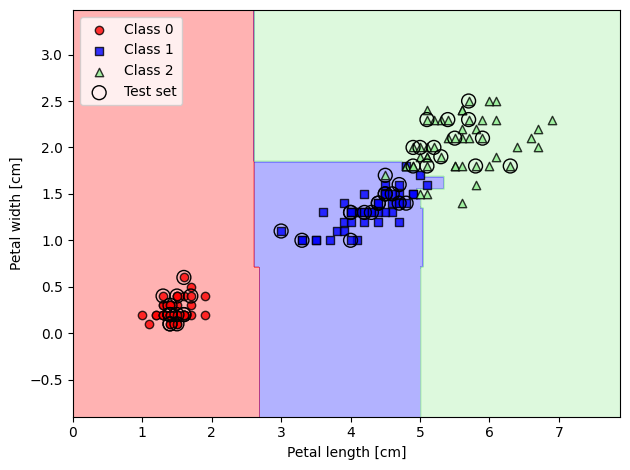

In [79]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2) # Silakan diisi bagian ini dengan kode yang tepat (10)

# Latih model dengan data training
forest.fit(X_train, y_train)

# Visualisasikan decision boundary dari Random Forest
# - X_combined, y_combined → gabungan data latih + uji
# - classifier=forest → gunakan model Random Forest yang sudah dilatih
# - test_idx=range(105, 150) → tandai data uji (45 sampel terakhir)
plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

# Label sumbu
plt.xlabel('Petal length [cm]')
plt.ylabel('Petal width [cm]')

# Tambahkan legenda
plt.legend(loc='upper left')

# Rapikan tata letak
plt.tight_layout()

# Tampilkan plot
plt.show()


<br>
<br>

## 9) Model 6 :K-nearest neighbors 

<ul><strong>
  <li><b>K-Nearest Neighbors (KNN)</b> adalah algoritma klasifikasi berbasis jarak yang menentukan kelas suatu data baru berdasarkan mayoritas kelas dari <i>k</i> tetangga terdekatnya.</li>
  <li>Metode ini sederhana namun efektif, terutama pada data yang tidak terlalu besar.</li>
  <li>Parameter penting:</li>
  <ul>
    <li><b>n_neighbors</b> → Jumlah tetangga terdekat yang digunakan untuk voting (contoh: <code>n_neighbors=5</code>).</li>
    <li><b>p</b> → Parameter pada <i>Minkowski distance</i>: 
      <ul>
        <li><code>p=2</code> → menggunakan jarak Euclidean.</li>
        <li><code>p=1</code> → menggunakan jarak Manhattan.</li>
      </ul>
    </li>
    <li><b>metric</b> → Jenis metrik jarak yang digunakan, umumnya <code>'minkowski'</code>.</li>
  </ul>
<strong></ul>


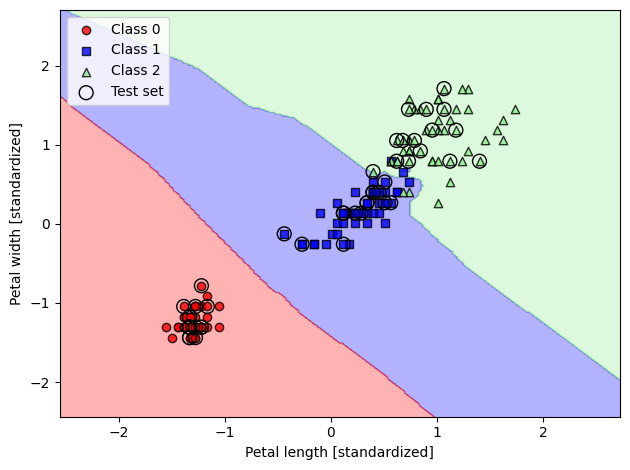

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski') # Silakan diisi bagian ini dengan kode yang tepat (10)

# Latih model KNN dengan data training yang sudah distandardisasi
knn.fit(X_train_std, y_train)

# Visualisasikan decision boundary KNN
# - X_combined_std, y_combined → gabungan data latih + uji (sudah distandardisasi)
# - classifier=knn → gunakan model KNN yang sudah dilatih
# - test_idx=range(105,150) → tandai data uji (45 sampel terakhir) dengan lingkaran
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

# Label sumbu
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')

# Tambahkan legenda
plt.legend(loc='upper left')

# Rapikan tata letak
plt.tight_layout()

# Tampilkan plot
plt.show()


## Simpan & Muat Model dengan Pickle

In [83]:
import pickle # Silakan diisi bagian ini dengan kode yang tepat (5)

# Simpan model Random Forest
with open("RF_model.pkl", "wb") as f:
    pickle.dump(forest, f)

print("Model Random Forest berhasil disimpan ke RF_model.pkl")

Model Random Forest berhasil disimpan ke RF_model.pkl
